## Preprocessing

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Step 3.1: Load the Dataset

df = pd.read_csv(r'Dataset\creditcard.csv')

# Display the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Step 3.2: Handle Missing Values
# Check for missing values in the dataset
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Handle missing values (if any)
# Option 1: Drop rows with missing values (if the number of missing values is small)
df.dropna(inplace=True)

# Option 2: Fill missing values with the mean/median/mode (for numerical columns)
# Example: df['column_name'].fillna(df['column_name'].mean(), inplace=True)

# Verify that there are no missing values left
print("\nMissing values after handling:")
print(df.isnull().sum())

# Step 3.3: Remove Duplicates
# Check for duplicate rows
print("\nNumber of duplicate rows in the dataset:")
print(df.duplicated().sum())

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Verify that duplicates have been removed
print("\nNumber of duplicate rows after removal:")
print(df.duplicated().sum())

# Step 3.4: Normalize/Scale Data
# Normalize numerical features (e.g., 'Amount' column)
# Initialize the StandardScaler
scaler = StandardScaler()

# Normalize the 'Amount' column
df['Amount'] = scaler.fit_transform(df[['Amount']])

# Display the first 5 rows after normalization
print("\nFirst 5 rows after normalizing the 'Amount' column:")
print(df.head())

# Step 3.5: Encode Categorical Variables (if any)
# Check for categorical columns
print("\nCategorical columns in the dataset:")
print(df.select_dtypes(include=['object']).columns)

# If there are categorical columns, encode them using One-Hot Encoding
# Example: If 'Category' is a categorical column
# df = pd.get_dummies(df, columns=['Category'], drop_first=True)

# Display the first 5 rows after encoding (if applicable)
print("\nFirst 5 rows after encoding categorical variables (if any):")
print(df.head())

# Final dataset after preprocessing
print("\nFinal dataset after preprocessing:")
print(df.info())

First 5 rows of the dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

   

## EDA

Distribution of the target variable (Class):
Class
0    284315
1       492
Name: count, dtype: int64


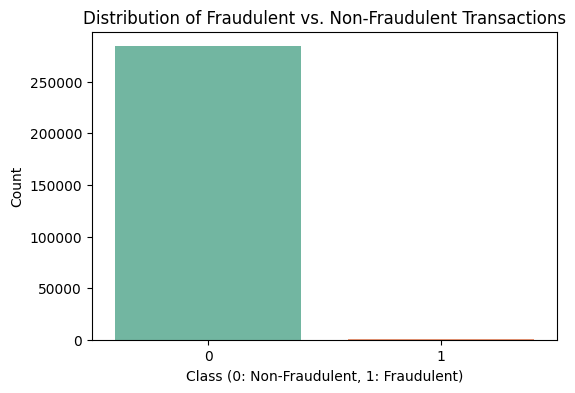

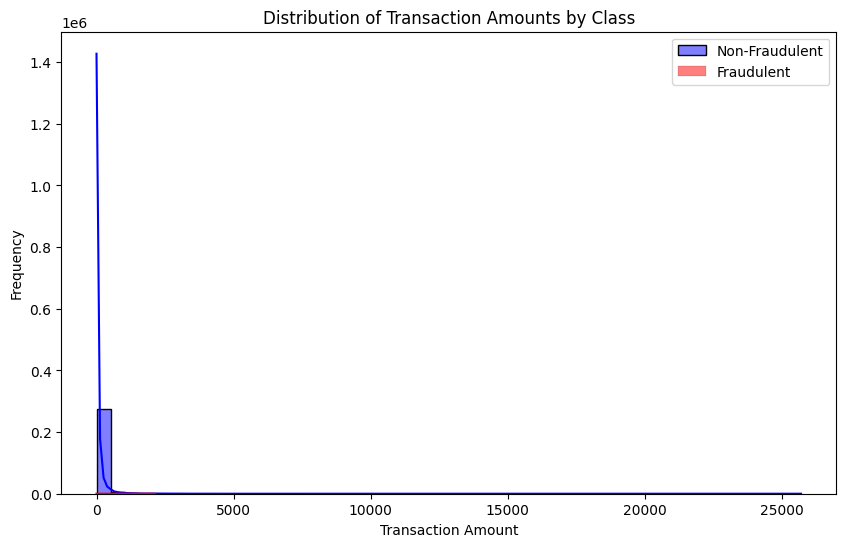

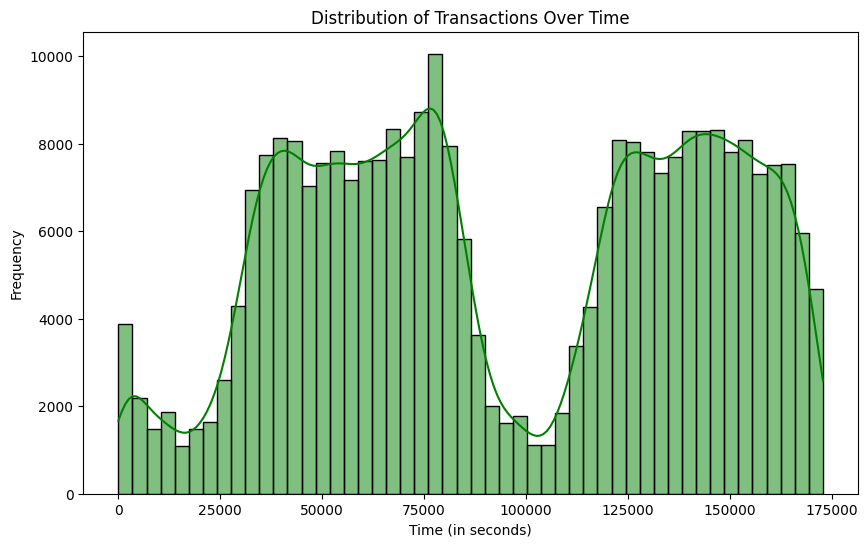

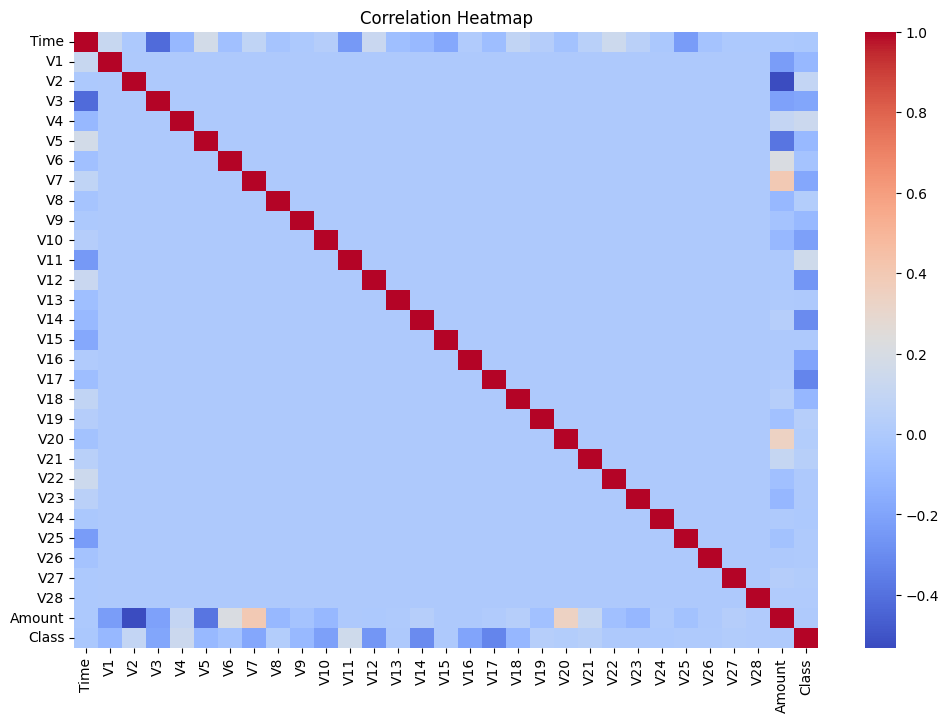

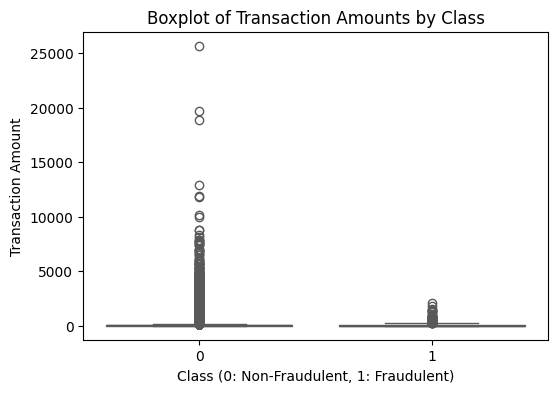

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Step 3.1: Load the Dataset

df = pd.read_csv(r'Dataset\creditcard.csv')

print("Distribution of the target variable (Class):")
print(df['Class'].value_counts())

# Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df, hue='Class', palette='Set2', legend=False)
plt.title('Distribution of Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Class (0: Non-Fraudulent, 1: Fraudulent)')
plt.ylabel('Count')
plt.show()

# Step 4.2: Visualize Transaction Amounts
# Plot the distribution of transaction amounts for fraudulent and non-fraudulent transactions
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Class'] == 0]['Amount'], bins=50, color='blue', label='Non-Fraudulent', kde=True)
sns.histplot(df[df['Class'] == 1]['Amount'], bins=50, color='red', label='Fraudulent', kde=True)
plt.title('Distribution of Transaction Amounts by Class')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Step 4.3: Time-Based Analysis
# Plot the distribution of transactions over time
plt.figure(figsize=(10, 6))
sns.histplot(df['Time'], bins=50, color='green', kde=True)
plt.title('Distribution of Transactions Over Time')
plt.xlabel('Time (in seconds)')
plt.ylabel('Frequency')
plt.show()

# Step 4.4: Correlation Analysis
# Plot a correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Step 4.5: Outlier Detection
# Plot boxplots for the 'Amount' column to detect outliers
plt.figure(figsize=(6, 4))
sns.boxplot(x='Class', y='Amount', data=df, hue='Class', palette='Set2', legend=False)
plt.title('Boxplot of Transaction Amounts by Class')
plt.xlabel('Class (0: Non-Fraudulent, 1: Fraudulent)')
plt.ylabel('Transaction Amount')
plt.show()

## Handling Imbalanced Data

Distribution of the target variable in the training set (before SMOTE):
Class
0    227451
1       394
Name: count, dtype: int64

Distribution of the target variable in the training set (after SMOTE):
Class
0    227451
1    227451
Name: count, dtype: int64


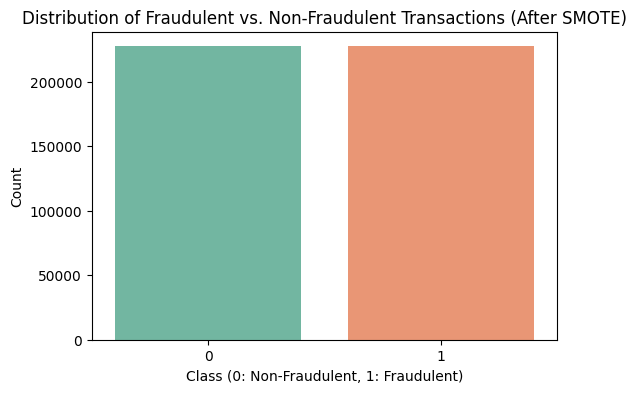

In [3]:
# Step 5: Handling Imbalanced Data

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

df = pd.read_csv(r'Dataset\creditcard.csv')

X = df.drop('Class', axis=1)  # All columns except 'Class'
y = df['Class']  # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the distribution of the target variable in the training set
print("Distribution of the target variable in the training set (before SMOTE):")
print(y_train.value_counts())

# Step 5.2: Apply SMOTE to Balance the Dataset
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the distribution of the target variable after applying SMOTE
print("\nDistribution of the target variable in the training set (after SMOTE):")
print(y_train_resampled.value_counts())

# Step 5.3: Verify the Balanced Dataset
# Plot the distribution of the target variable after balancing
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_resampled, hue=y_train_resampled, palette='Set2', legend=False)
plt.title('Distribution of Fraudulent vs. Non-Fraudulent Transactions (After SMOTE)')
plt.xlabel('Class (0: Non-Fraudulent, 1: Fraudulent)')
plt.ylabel('Count')
plt.show()

## Feature Engineering

In [4]:


# Step 6.1: Create New Features
# Example: Create a new feature 'Hour' based on the 'Time' column
df['Hour'] = df['Time'] // 3600  # Convert time in seconds to hours

# Step 6.2: Scale Features
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Scale the features in the training and testing sets
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames
X_train_resampled_scaled = pd.DataFrame(X_train_resampled_scaled, columns=X_train_resampled.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Display the first 5 rows of the scaled training set
print("\nFirst 5 rows of the scaled training set:")
print(X_train_resampled_scaled.head())


First 5 rows of the scaled training set:
       Time        V1        V2        V3        V4        V5        V6  \
0  1.517482  0.804044 -0.730104  0.369177 -0.949778  0.754561  2.812865   
1  0.739544  0.820274 -0.534474  0.093771 -0.661579  1.103696  2.381830   
2 -0.990902  0.264538 -0.353182  0.703355 -1.054590  0.190226  1.585068   
3  0.908815  0.866275 -0.937985  0.467399 -1.268684  0.052501  0.216055   
4 -0.613423  0.364258 -0.802088  0.606991 -1.834810  0.563824  0.336450   

         V7        V8        V9  ...       V20       V21       V22       V23  \
0  0.246889  0.171154  1.237646  ... -0.305128 -0.101682  0.257532  0.318804   
1  0.507576  0.070471  0.620903  ... -0.395313 -0.116574  0.193383  0.056558   
2  0.117567 -1.166115  0.600486  ...  1.069629 -1.241195  0.083595 -0.397964   
3  0.256007 -0.073438  0.093304  ... -0.651133 -0.187254  0.053516  0.222903   
4  0.596951 -0.100243  0.579843  ... -0.441956 -0.228313 -0.178058  0.015894   

        V24       V25     

## Model Building

In [5]:
# Step 7: Model Building

# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Step 7.1: Train a Logistic Regression Model (Baseline)
# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Train the model on the resampled and scaled training data
log_reg.fit(X_train_resampled_scaled, y_train_resampled)

# Step 7.2: Train a Random Forest Model
# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Train the model on the resampled and scaled training data
rf.fit(X_train_resampled_scaled, y_train_resampled)

# Step 7.3: Train an XGBoost Model
# Initialize the XGBoost model
xgb = XGBClassifier(random_state=42, eval_metric='logloss')

# Train the model on the resampled and scaled training data
xgb.fit(X_train_resampled_scaled, y_train_resampled)

# Step 7.4: Hyperparameter Tuning (Optional)
# Example: Hyperparameter tuning for Random Forest using GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='recall')

# Fit GridSearchCV on the training data
grid_search.fit(X_train_resampled_scaled, y_train_resampled)

# Get the best parameters
print("Best parameters for Random Forest:", grid_search.best_params_)

# Step 7.5: Cross-Validation
# Perform cross-validation for Logistic Regression
log_reg_cv_scores = cross_val_score(log_reg, X_train_resampled_scaled, y_train_resampled, cv=5, scoring='recall')
print("\nCross-validation recall scores for Logistic Regression:", log_reg_cv_scores)
print("Mean recall score for Logistic Regression:", log_reg_cv_scores.mean())

# Perform cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf, X_train_resampled_scaled, y_train_resampled, cv=5, scoring='recall')
print("\nCross-validation recall scores for Random Forest:", rf_cv_scores)
print("Mean recall score for Random Forest:", rf_cv_scores.mean())

# Perform cross-validation for XGBoost
xgb_cv_scores = cross_val_score(xgb, X_train_resampled_scaled, y_train_resampled, cv=5, scoring='recall')
print("\nCross-validation recall scores for XGBoost:", xgb_cv_scores)
print("Mean recall score for XGBoost:", xgb_cv_scores.mean())

Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}

Cross-validation recall scores for Logistic Regression: [0.96849857 0.96838935 0.96918004 0.9694878  0.96673994]
Mean recall score for Logistic Regression: 0.9684591409569059

Cross-validation recall scores for Random Forest: [0.99993405 1.         1.         1.         1.        ]
Mean recall score for Random Forest: 0.9999868102879754

Cross-validation recall scores for XGBoost: [1. 1. 1. 1. 1.]
Mean recall score for XGBoost: 1.0


## Model Evaluation

In [6]:
# Step 8: Model Evaluation

# Step 8.1: Evaluate Logistic Regression
# Make predictions on the testing set
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Print classification report and confusion matrix
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

# Calculate ROC-AUC score
roc_auc_log_reg = roc_auc_score(y_test, log_reg.predict_proba(X_test_scaled)[:, 1])
print("Logistic Regression ROC-AUC Score:", roc_auc_log_reg)

# Step 8.2: Evaluate Random Forest
# Make predictions on the testing set
y_pred_rf = rf.predict(X_test_scaled)

# Print classification report and confusion matrix
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Calculate ROC-AUC score
roc_auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test_scaled)[:, 1])
print("Random Forest ROC-AUC Score:", roc_auc_rf)

# Step 8.3: Evaluate XGBoost
# Make predictions on the testing set
y_pred_xgb = xgb.predict(X_test_scaled)

# Print classification report and confusion matrix
print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

# Calculate ROC-AUC score
roc_auc_xgb = roc_auc_score(y_test, xgb.predict_proba(X_test_scaled)[:, 1])
print("XGBoost ROC-AUC Score:", roc_auc_xgb)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.13      0.90      0.23        98

    accuracy                           0.99     56962
   macro avg       0.57      0.94      0.61     56962
weighted avg       1.00      0.99      0.99     56962

Logistic Regression Confusion Matrix:
[[56296   568]
 [   10    88]]
Logistic Regression ROC-AUC Score: 0.9764816590676788

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.83      0.83        98

    accuracy                           1.00     56962
   macro avg       0.92      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Random Forest Confusion Matrix:
[[56848    16]
 [   17    81]]
Random Forest ROC-AUC Score: 0.9644232605112952

XGBoost Classification Report: